https://pysource.com/2018/01/26/add-images-and-threshold-opencv-3-4-with-python-3-tutorial-5/

In [1]:
import cv2
import numpy as np

In [2]:
img1 = cv2.imread("images/road.jpg")
img2 = cv2.imread("images/car.jpg")
cv2.imshow("road", img1)
cv2.imshow("car", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

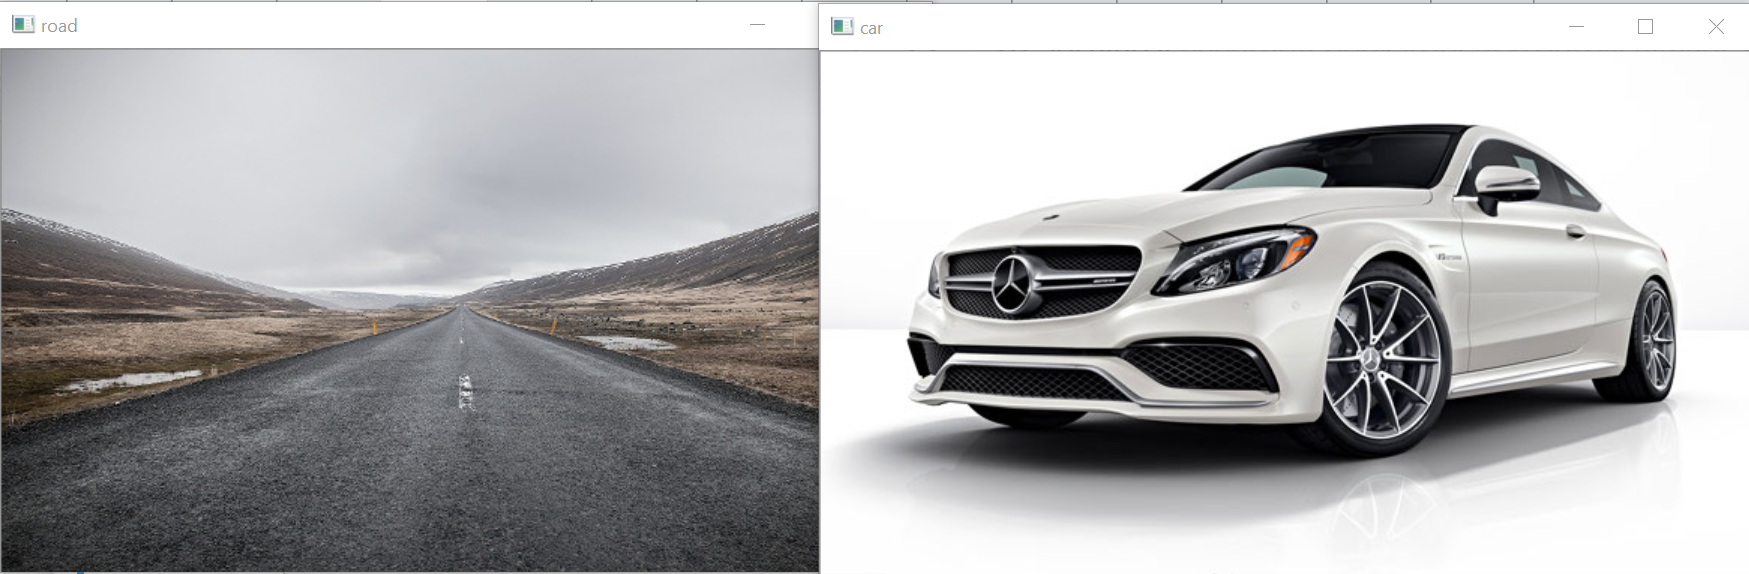

to add images, they must be same size

In [3]:
sum = cv2.add(img1, img2)
cv2.imshow("sum", sum)
cv2.waitKey(0)
cv2.destroyAllWindows()

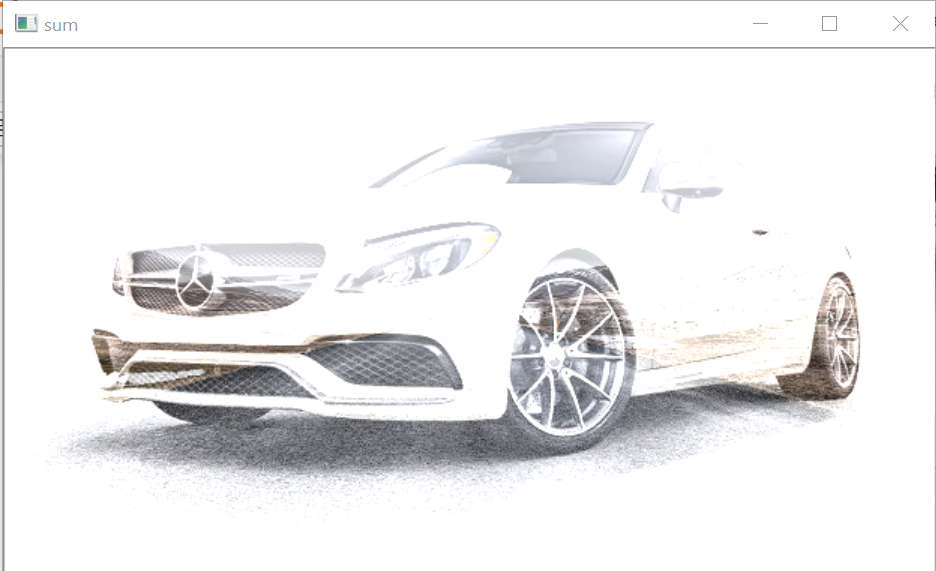

not a good way to add images. after addition if more than 255, then all white.
that is why this image is almost completely all white.

better add in a weighted way

weighted = cv2.addWeighted(img1, 1, img2, 0.5, 0)
cv2.imshow("weighted", weighted)
cv2.waitKey(0)
cv2.destroyAllWindows()

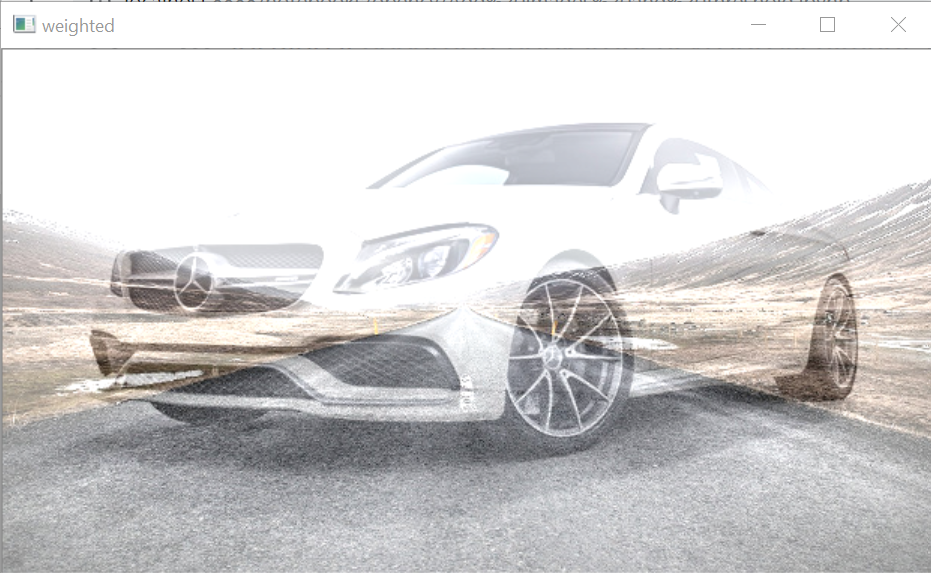

to do this job in a proper manner we need to remove the background of the car image.

In [4]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret, threshold = cv2.threshold(img2_gray, 0, 255, cv2.THRESH_BINARY)
cv2.imshow("threshold 0", threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

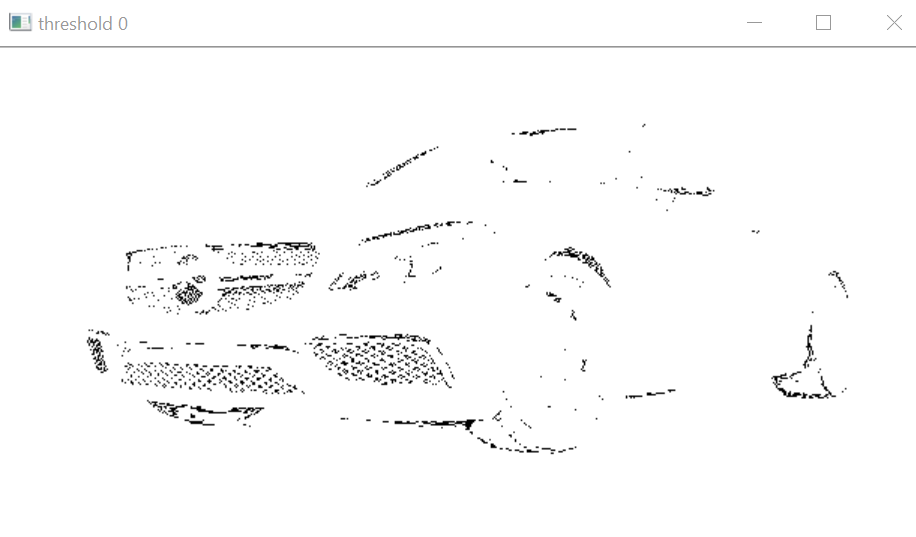

In [5]:
ret, threshold = cv2.threshold(img2_gray, 127, 255, cv2.THRESH_BINARY)
cv2.imshow("threshold 127", threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

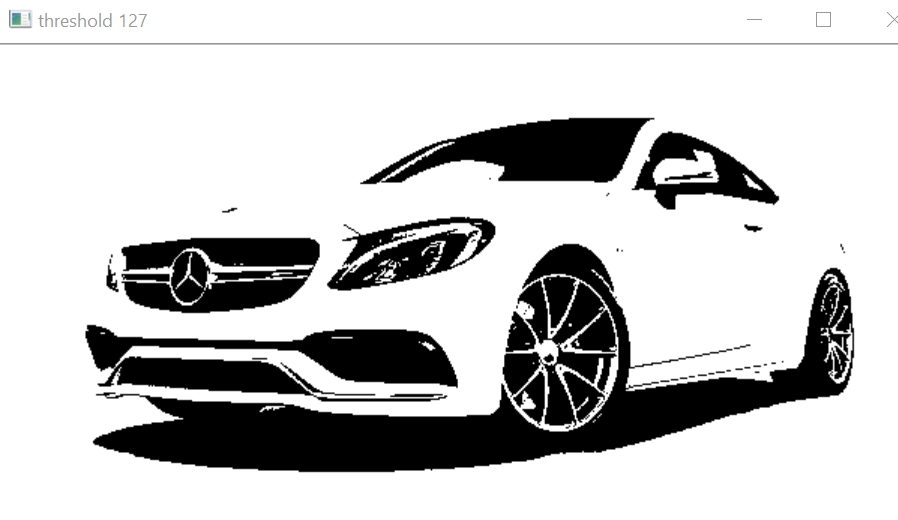

In [6]:
ret, threshold = cv2.threshold(img2_gray, 240, 255, cv2.THRESH_BINARY)
cv2.imshow("threshold 240", threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

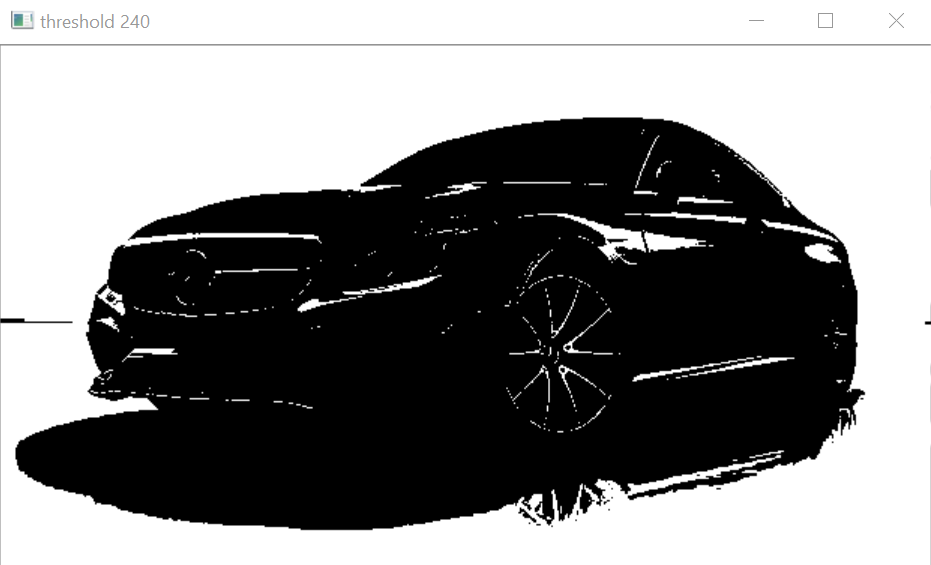

In [7]:
ret, threshold = cv2.threshold(img2_gray, 252, 255, cv2.THRESH_BINARY)
cv2.imshow("threshold 252", threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

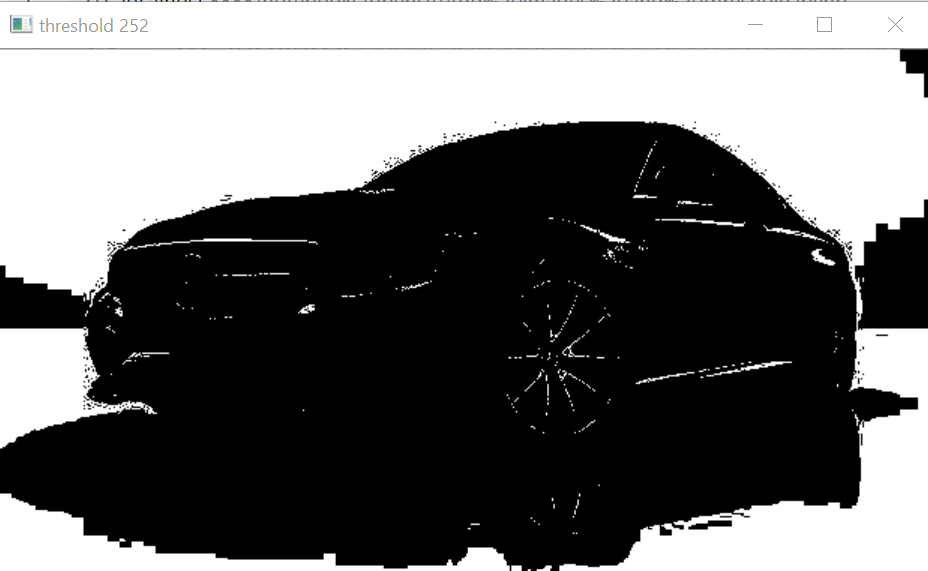

we can treat inverse of this image as a mask to select the portion of car that we want to place on the road

In [15]:
ret, mask = cv2.threshold(img2_gray, 252, 255, cv2.THRESH_BINARY_INV)
sum = cv2.add(img2, img2, mask=mask)
cv2.imshow("Sum", sum)
cv2.waitKey(0)
cv2.destroyAllWindows()

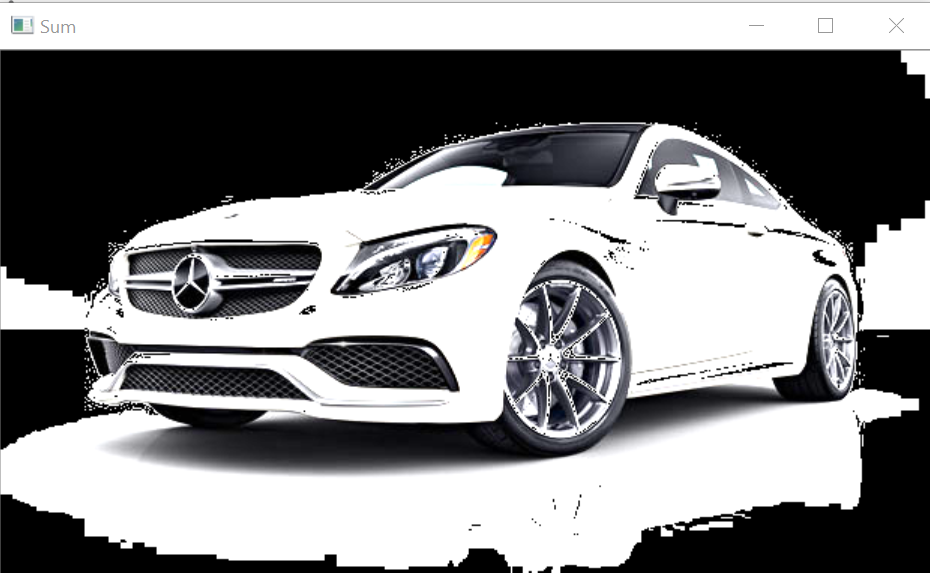